# **Análisis de Series Temporales y Aprendizaje Automático - DataSet: Conjunto de datos de pasajeros aéreos - Train y Test**

***Predicción de pasajeros de líneas aéreas mediante un Dataset del numero de pasageros por fecha, Análisis de Series Temporales y Modelos de Aprendizaje automático***

# **INTELIGENCIA ARTIFICIAL. OMV - AI 2024- I**

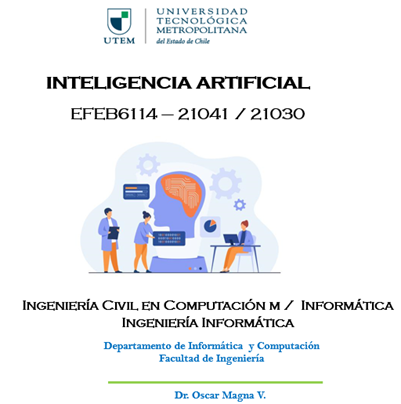

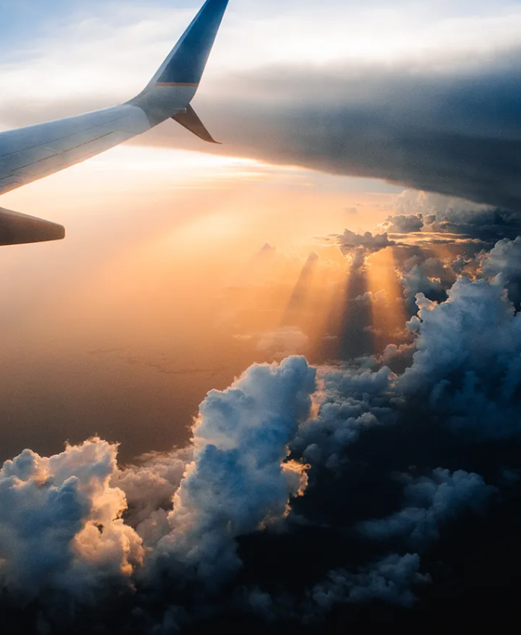

# **OBJETIVO**

Analizar el comportamiento de una serie temporal correspondiente a las cifras mensuales de pasajeros en un perìodo, utilizando algunas tècnicas de anàlisis  de Series Temporales.


#ALCANCES

- Se realiza un análisis exploratorio (EDA), con estrategia de modelado de aprendizaje automático supervisado, para lograr una explicabilidad del modelo realizado en un conjunto de datos que detalla la satisfacción del cliente de una aerolínea.
- Se utilizarán 8 tècnicas de anàlisis y predictibilidad.


#DATASET


- El conjunto de datos se encuentra en Kaggle y en Github.
- Links:
  - Caso con Train y Test: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


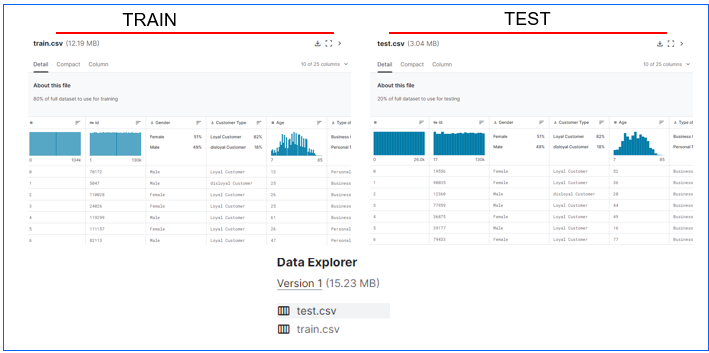

#Información del Dataset.

- Los siguientes datos corresponden a la información sobre los pasajeros de alguna compañía aérea:

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes:**
22. **Arrival delay in minutes:**
23. **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction).


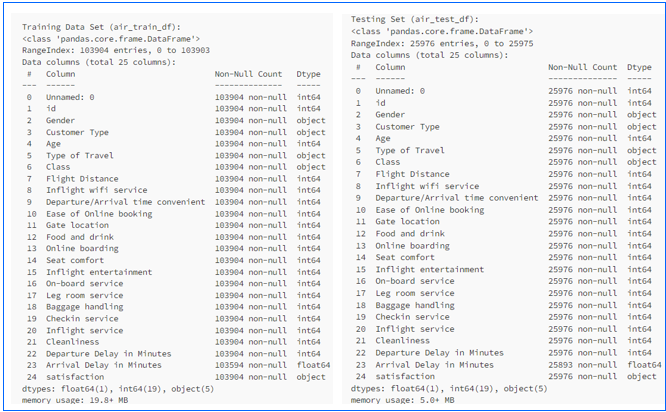

# **PARTE 1**

### Importación de los paquetes necesarios

In [ ]:
!pip install scikit-plot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler

In [ ]:
#from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc_curve

In [ ]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
!pip install eli5

In [ ]:
#
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Lectura de los Datasets

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial/test.csv")

### Entrenamiento del Dataset

In [ ]:
# Get Number of records and columns TRAIN Data
print(train.shape)
train.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Validación (Test) del Dataset

In [ ]:
# Get Number of records and columns TEST Data
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

### Sustitución de los espacios en los nombres de las columnas por guiones bajos - Train and Test

In [ ]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

### Sustitución de los valores de la columna **satisfacción**" por *0 y 1 (neutro o insatisfecho = 0 y satisfecho = 1)* - Entrenamiento y prueba - Train and Test

In [ ]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

### Comprobación de la naturaleza de los datos- balanced or imbalanced

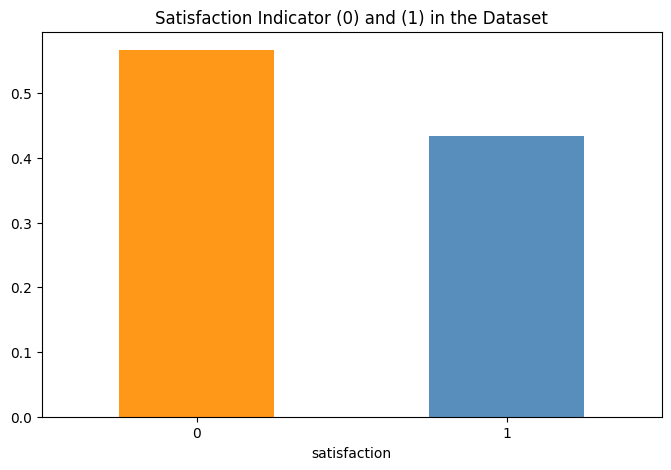

In [ ]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

- El gráfico anterior muestra una distribución de aproximadamente 55:45 entre pasajeros neutrales/insatisfechos y pasajeros satisfechos, respectivamente.
- Así pues, los datos están bastante equilibrados y no es necesario aplicar ningún método especial de remuestreo.

### Gestión de los datos que faltan ("missing data")

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [ ]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [ ]:
# Replace NaN with mode for categorical variables - Train and Test

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### EDA *(Exploratory Data Analysis)*

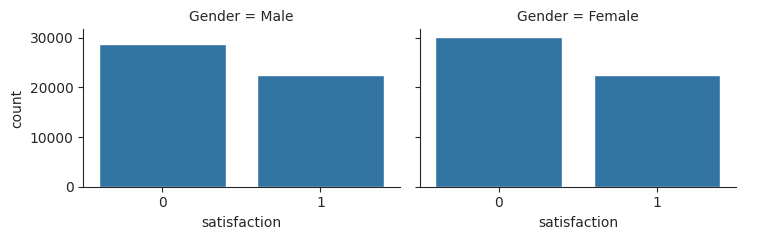

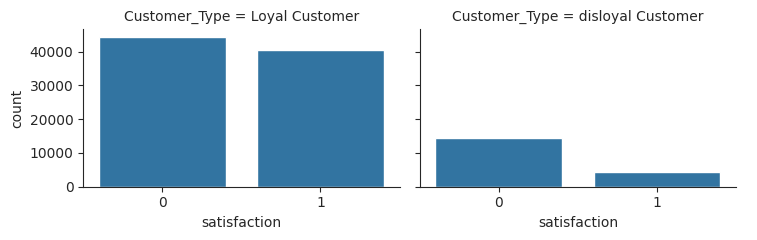

In [ ]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g1 = sns.catplot(
        data=train,
        kind="count",
        height=2.5,
        aspect=1.5,
        col="Gender",
        x="satisfaction",
    )

    g2 = sns.catplot(
        data=train,
        kind="count",
        height=2.5,
        aspect=1.5,
        col="Customer_Type",
        x="satisfaction",
    )

**Gender:** <br/>
- Se observa que la distribución por sexos de los clientes neutrales/insatisfechos y satisfechos es similar. Tanto en el caso de los pasajeros masculinos como en el de los femeninos, el número de clientes neutrales/insatisfechos es mayor que el de clientes satisfechos.

**Customer Type:** <br/>
- Incluso entre los pasajeros fieles, que son muchos, la proporción entre satisfechos y neutrales/insatisfechos se acerca casi al 49:51.

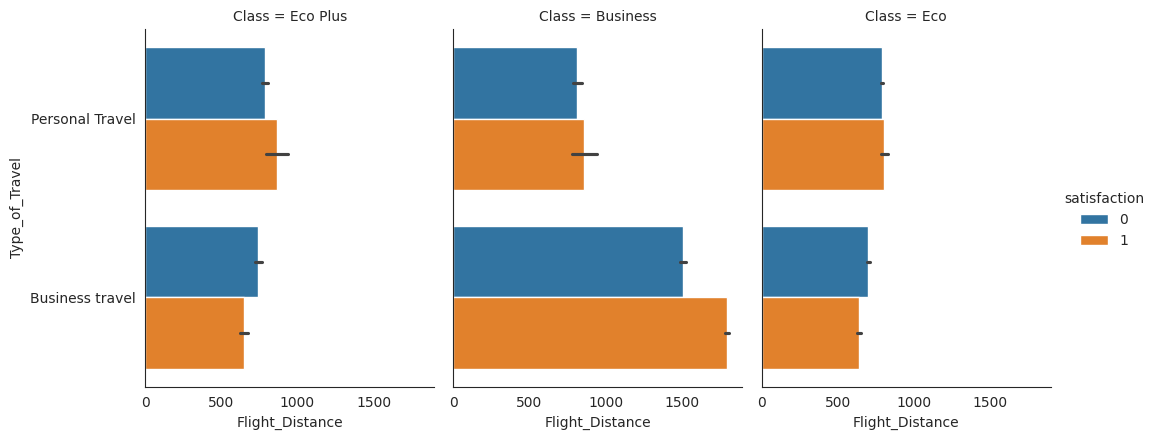

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

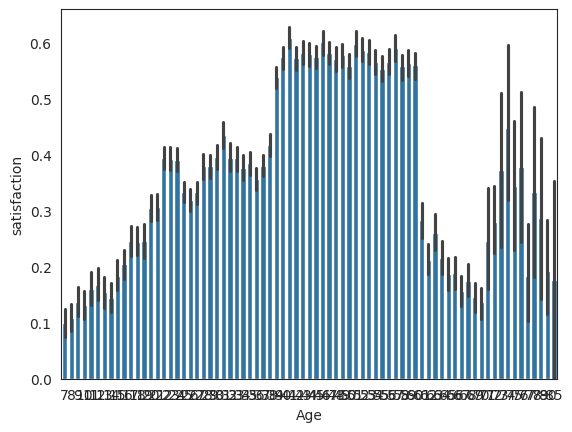

In [ ]:
# Age
with sns.axes_style('white'):
    #g = sns.catplot(data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))

  g = sns.barplot(data=train, x="Age", y="satisfaction")

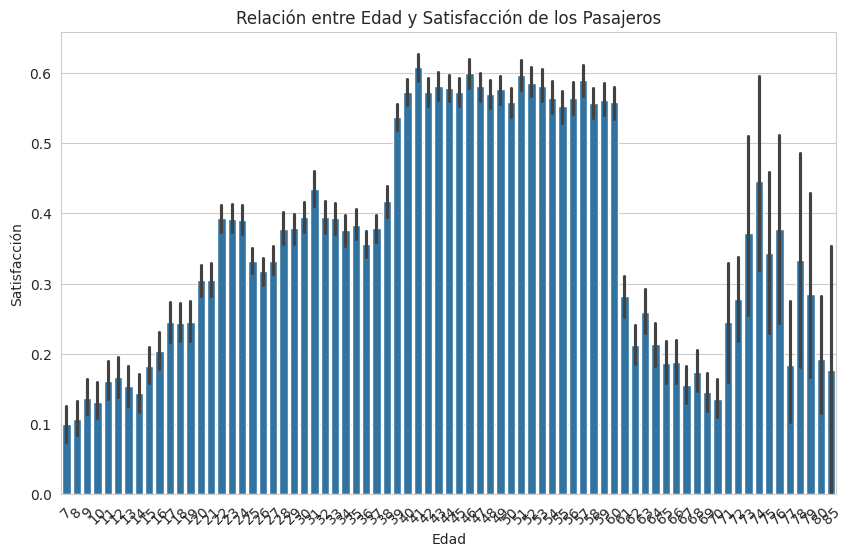

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de los gráficos
sns.set_style("whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(data=train, x="Age", y="satisfaction")

# Personaliza el gráfico
plt.xlabel("Edad")
plt.ylabel("Satisfacción")
plt.title("Relación entre Edad y Satisfacción de los Pasajeros")
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad

# Muestra el gráfico
plt.show()

**Tipo de viaje y distancia de vuelo agrupados por clase:** <br/>
- En el caso de los viajes de negocios en la categoría de clase preferente, el número de pasajeros satisfechos es bastante mayor para las distancias de vuelo más largas. En las demás combinaciones, la distribución de pasajeros satisfechos y neutrales/insatisfechos es casi igual.

**Age:** <br/> *(Type of Travel and Flight Distance grouped by Class)*

- De 7 a 38 años y de 61 a 79 años, el número de pasajeros neutrales/insatisfechos es muy elevado en comparación con los satisfechos.
- En cambio, en el grupo de edad de 39 a 60 años, el número de pasajeros satisfechos es superior al de pasajeros neutrales/insatisfechos.

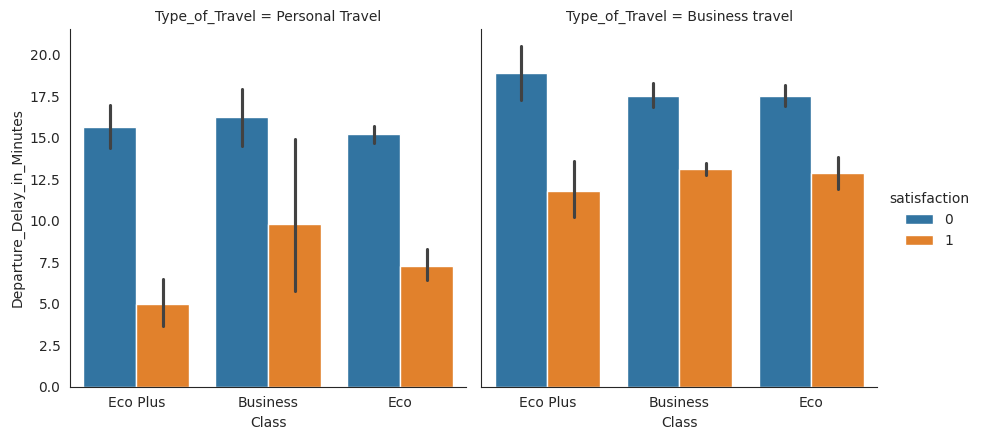

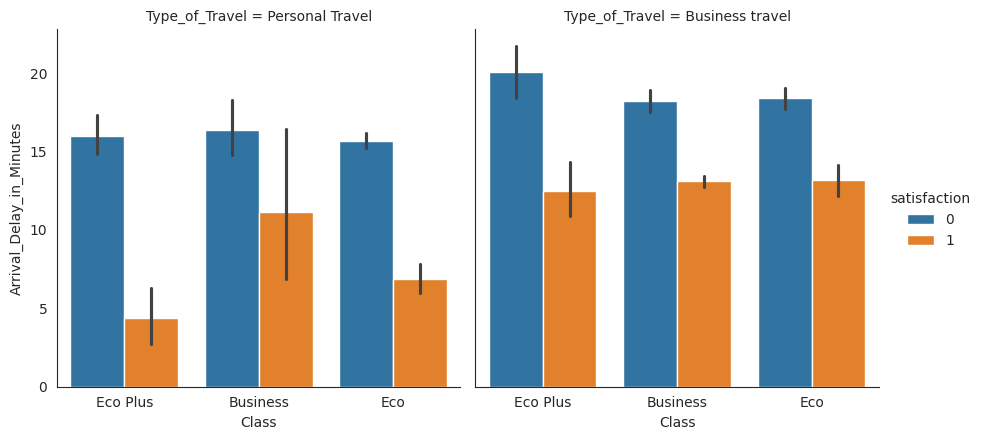

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)

**Departure Delay, Arrival Delay grouped by Type of Travel:** <br/>
For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers.

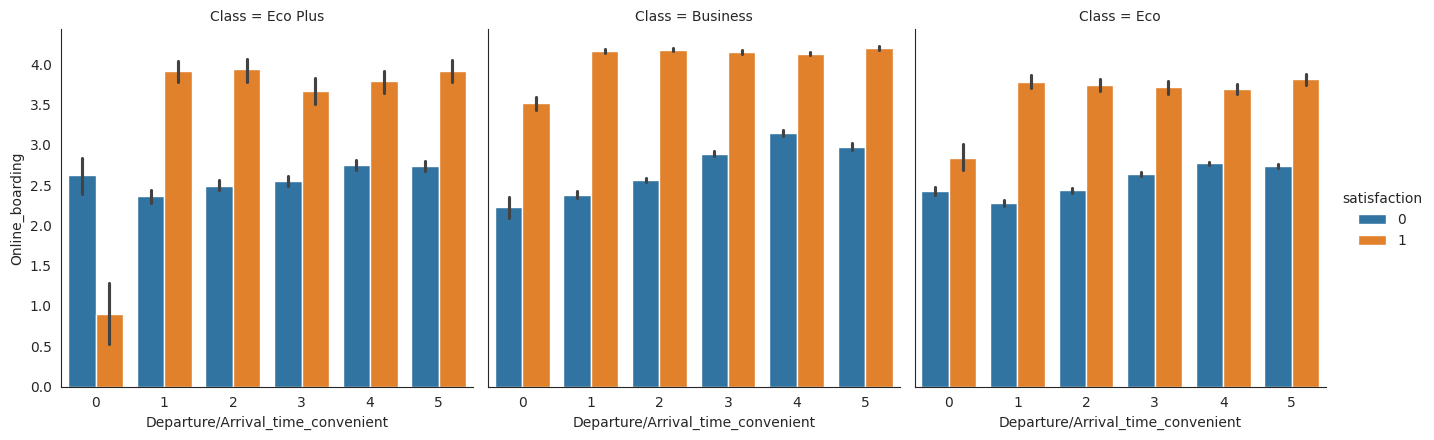

In [ ]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

**Embarque en línea, conveniencia de la hora de salida/llegada agrupados por clase:** <br/>
*(Online Boarding, Departure/Arrival Time Convenience grouped by Class)*
- Para la clase Eco Plus, la hora de salida/llegada muy incómoda, es decir, Hora_de_salida/llegada_conveniente = 0, tiene un alto número de pasajeros neutrales/insatisfechos, incluso cuando el embarque en línea está en el lado positivo.
- En las demás combinaciones, el número de pasajeros satisfechos es mayor que el de pasajeros neutrales o insatisfechos.


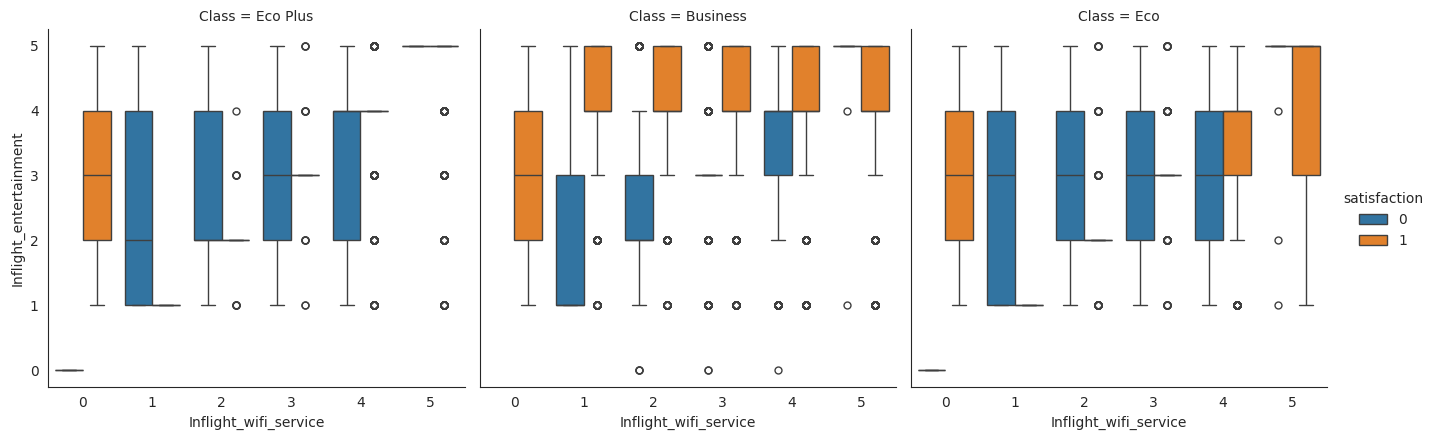

In [ ]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:** <br/>

**Entretenimiento a bordo, Servicio wi-fi a bordo agrupado por Clase:** <br/>
*(Inflight Entertainment, Inflight wi-fi Service grouped by Class)*
- Los pasajeros de Eco Plus están satisfechos en su mayoría sin el servicio wi-fi a bordo (puntuación 0) y con un nivel moderado de entretenimiento a bordo (puntuación 2 - 4).
- Los pasajeros de la clase Business sólo están satisfechos con el nivel más alto de entretenimiento a bordo (puntuación 5).
- Los pasajeros de la clase Eco están satisfechos con el alto nivel de entretenimiento a bordo (puntuación de 3 a 5) y la alta disponibilidad del servicio Wi-Fi (puntuación de 5).


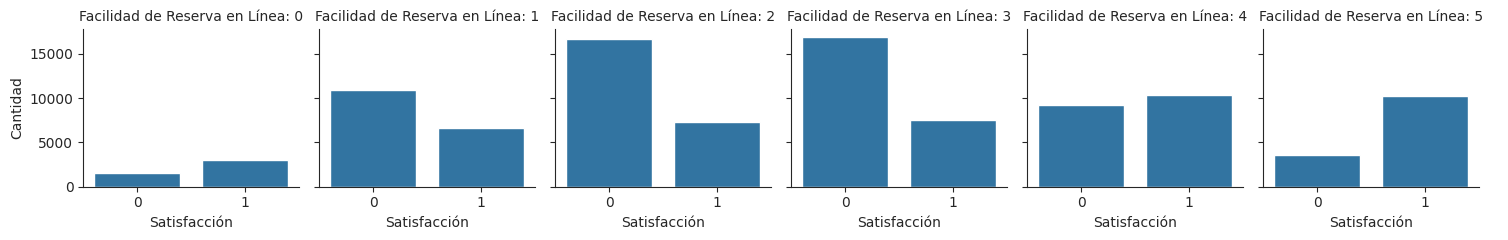

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style("ticks")

# Crea el gráfico de barras
g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", col_wrap=6,
                data=train, kind="count", height=2.5, aspect=1.0)

# Personaliza el gráfico
g.set_axis_labels("Satisfacción", "Cantidad")
g.set_titles("Facilidad de Reserva en Línea: {col_name}")

# Muestra el gráfico
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

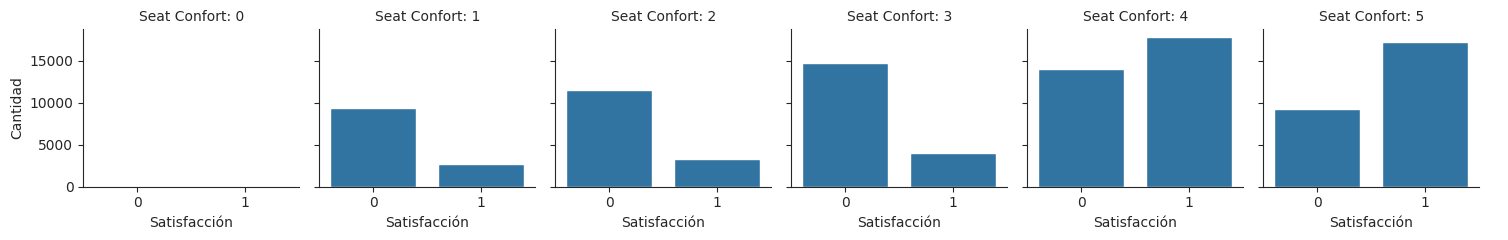

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style("ticks")

# Crea el gráfico de barras
g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6,
                data=train, kind="count", height=2.5, aspect=1.0)

# Personaliza el gráfico
g.set_axis_labels("Satisfacción", "Cantidad")
g.set_titles("Seat Confort: {col_name}")

# Muestra el gráfico
plt.show()

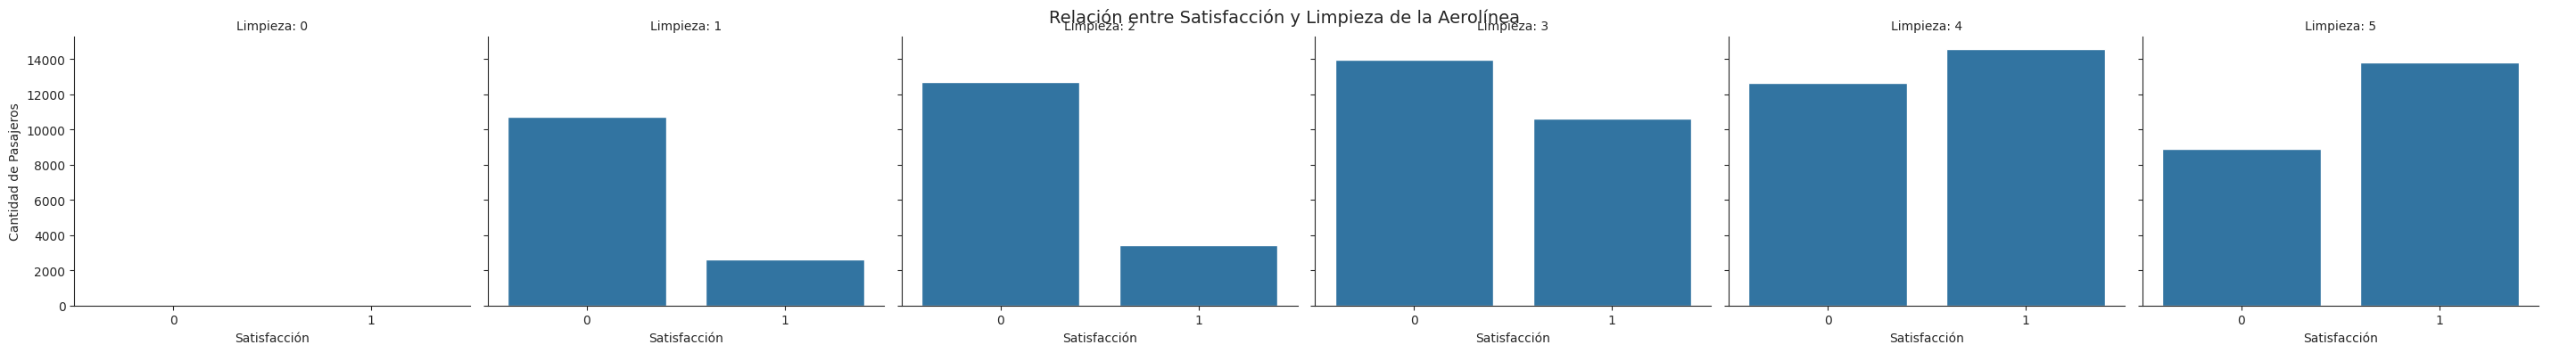

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style("ticks")

# Crea el gráfico de barras
g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6,
                data=train, kind="count", height=4, aspect=1.2)

# Personaliza el gráfico
g.set_axis_labels("Satisfacción", "Cantidad de Pasajeros")
g.set_titles("Limpieza: {col_name}")
plt.subplots_adjust(top=0.9)  # Ajusta la posición del título

# Muestra el gráfico
plt.suptitle("Relación entre Satisfacción y Limpieza de la Aerolínea", fontsize=14)
plt.show()

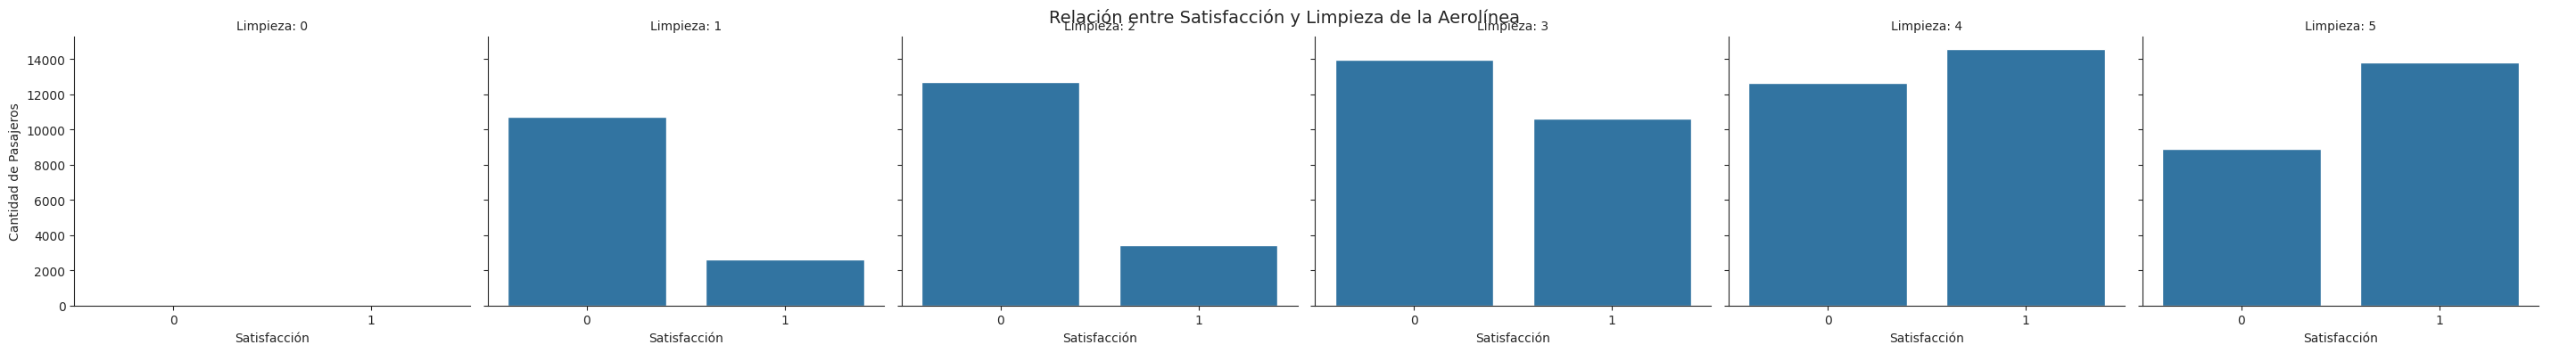

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style("ticks")

# Crea el gráfico de barras
g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6,
                data=train, kind="count", height=4, aspect=1.2)

# Personaliza el gráfico
g.set_axis_labels("Satisfacción", "Cantidad de Pasajeros")
g.set_titles("Limpieza: {col_name}")
plt.subplots_adjust(top=0.9)  # Ajusta la posición del título

# Muestra el gráfico
plt.suptitle("Relación entre Satisfacción y Limpieza de la Aerolínea", fontsize=14)
plt.show()

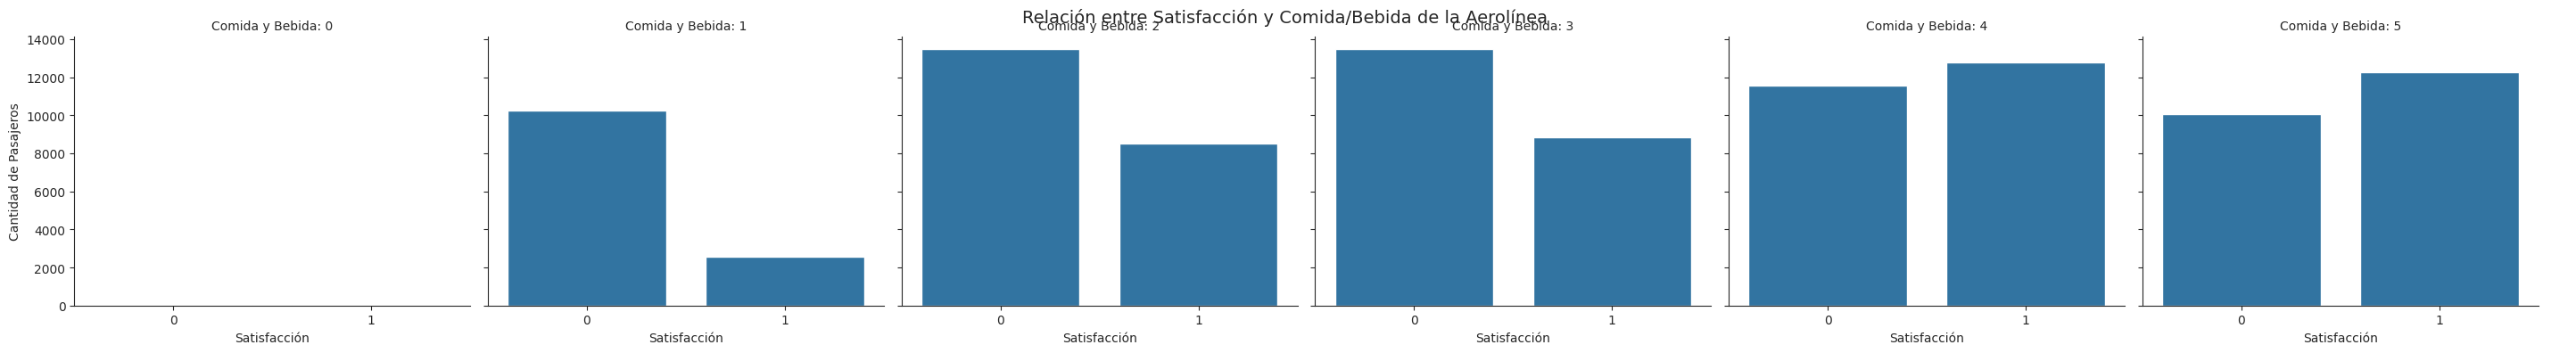

In [ ]:
# Food_and_drink

import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style("ticks")

# Crea el gráfico de barras
g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6,
                data=train, kind="count", height=4, aspect=1.2)

# Personaliza el gráfico
g.set_axis_labels("Satisfacción", "Cantidad de Pasajeros")
g.set_titles("Comida y Bebida: {col_name}")
plt.subplots_adjust(top=0.9)  # Ajusta la posición del título

# Muestra el gráfico
plt.suptitle("Relación entre Satisfacción y Comida/Bebida de la Aerolínea", fontsize=14)
plt.show()

In [ ]:
# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

TypeError: catplot() got multiple values for argument 'data'

**Facilidad de reserva en línea, comodidad de los asientos, limpieza y comida y bebida:** <br/>
*(Ease of Online Booking, Seat Comfort, Cleanliness & Food and Drink)*

- En estos cuatro aspectos, el mayor número de pasajeros satisfechos pertenece a la categoría de 4 y 5 puntos.
- Los pasajeros que dieron una puntuación inferior a 4 son en su mayoría neutrales o insatisfechos.


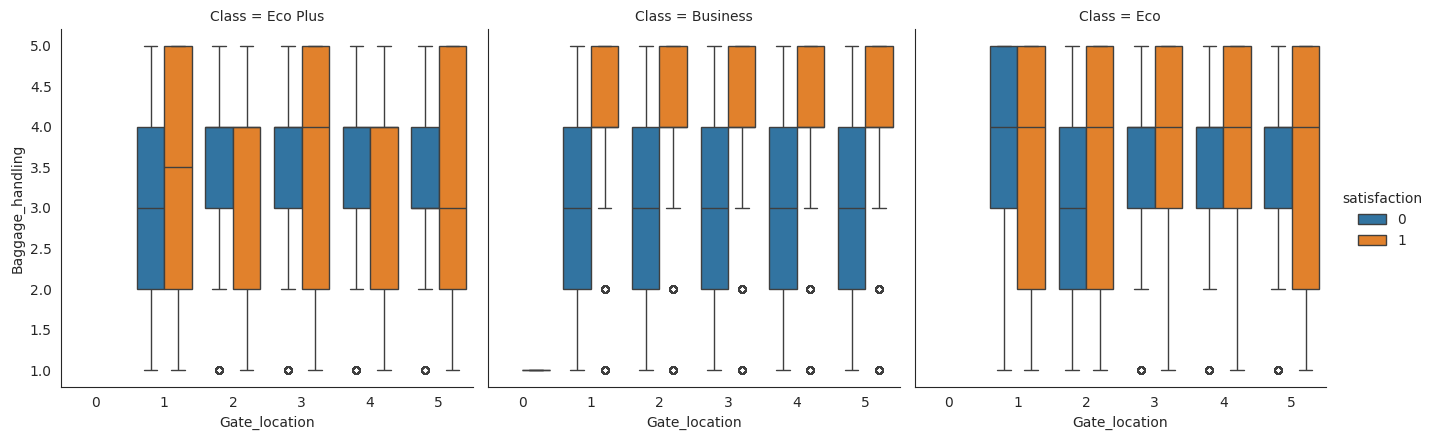

In [ ]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

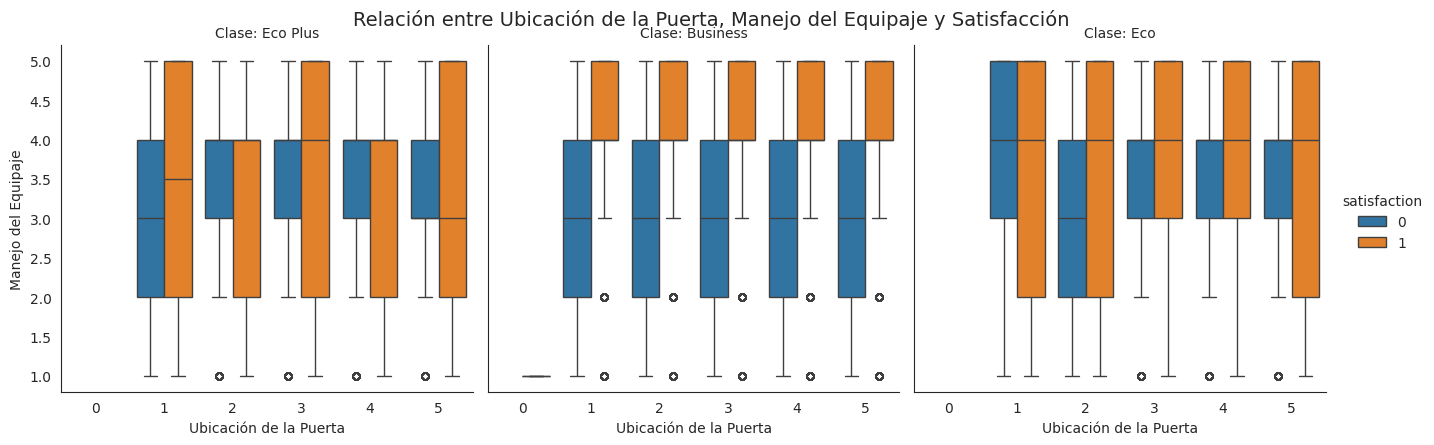

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de los gráficos
sns.set_style('white')

# Crea el gráfico de caja
g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction",
                col="Class", data=train, kind="box", height=4.5, aspect=1.0)

# Personaliza el gráfico
g.set_axis_labels("Ubicación de la Puerta", "Manejo del Equipaje")
g.set_titles("Clase: {col_name}")
plt.subplots_adjust(top=0.9)  # Ajusta la posición del título

# Muestra el gráfico
plt.suptitle("Relación entre Ubicación de la Puerta, Manejo del Equipaje y Satisfacción", fontsize=14)
plt.show()

**Ubicación de las puertas de embarque y tratamiento del equipaje por clase:** <br/>
*(Gate Location and Baggage Handling grouped by Class)*

- Para los pasajeros de clase Business, se observa que todas las puertas de embarque tienen un mayor número de pasajeros neutrales/insatisfechos cuando el tratamiento del equipaje no es satisfactorio (puntuación <= 4).
- ara la clase Eco Plus, cuando la puerta de embarque es la 1 y para la clase Eco, cuando la puerta de embarque es la 2, incluso cuando la gestión del equipaje es mediocre (puntuación de 2 a 4), los pasajeros se mantienen neutrales o insatisfechos.
  

<Axes: xlabel='Inflight_service', ylabel='satisfaction'>

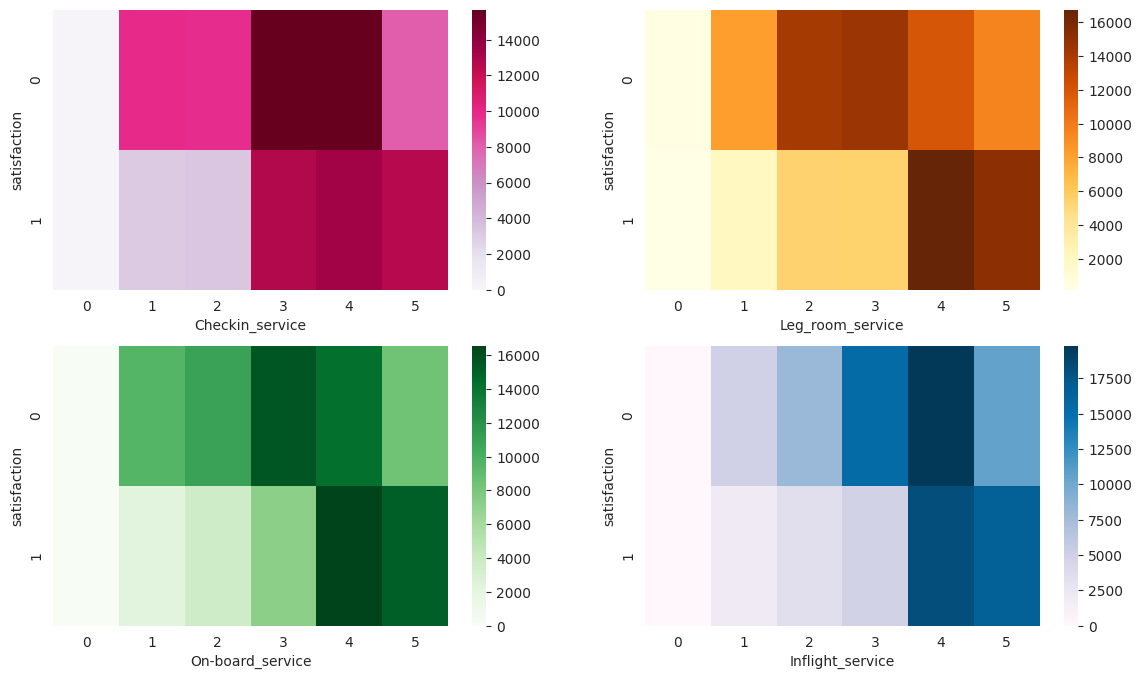

In [ ]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

**Servicio de facturación, servicio de espacio para las piernas, servicio a bordo y servicio durante el vuelo:** <br/>
*(Checkin Service, Leg-room Service, On-board Service and Inflight Service)*

- En cuanto a los servicios de facturación, los pasajeros que dieron una puntuación de 0 a 2 están mayoritariamente neutrales o insatisfechos.
- En cuanto a los otros tres servicios mencionados, sólo los clientes o pasajeros que dan una puntuación de 4 y 5 pertenecen a la categoría de pasajeros satisfechos.


### Label Encoding of Categorical Variables

In [ ]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [ ]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Detection and Removal of Outliers

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [ ]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Búsqueda de correlaciones entre características

Correlation Heatmap

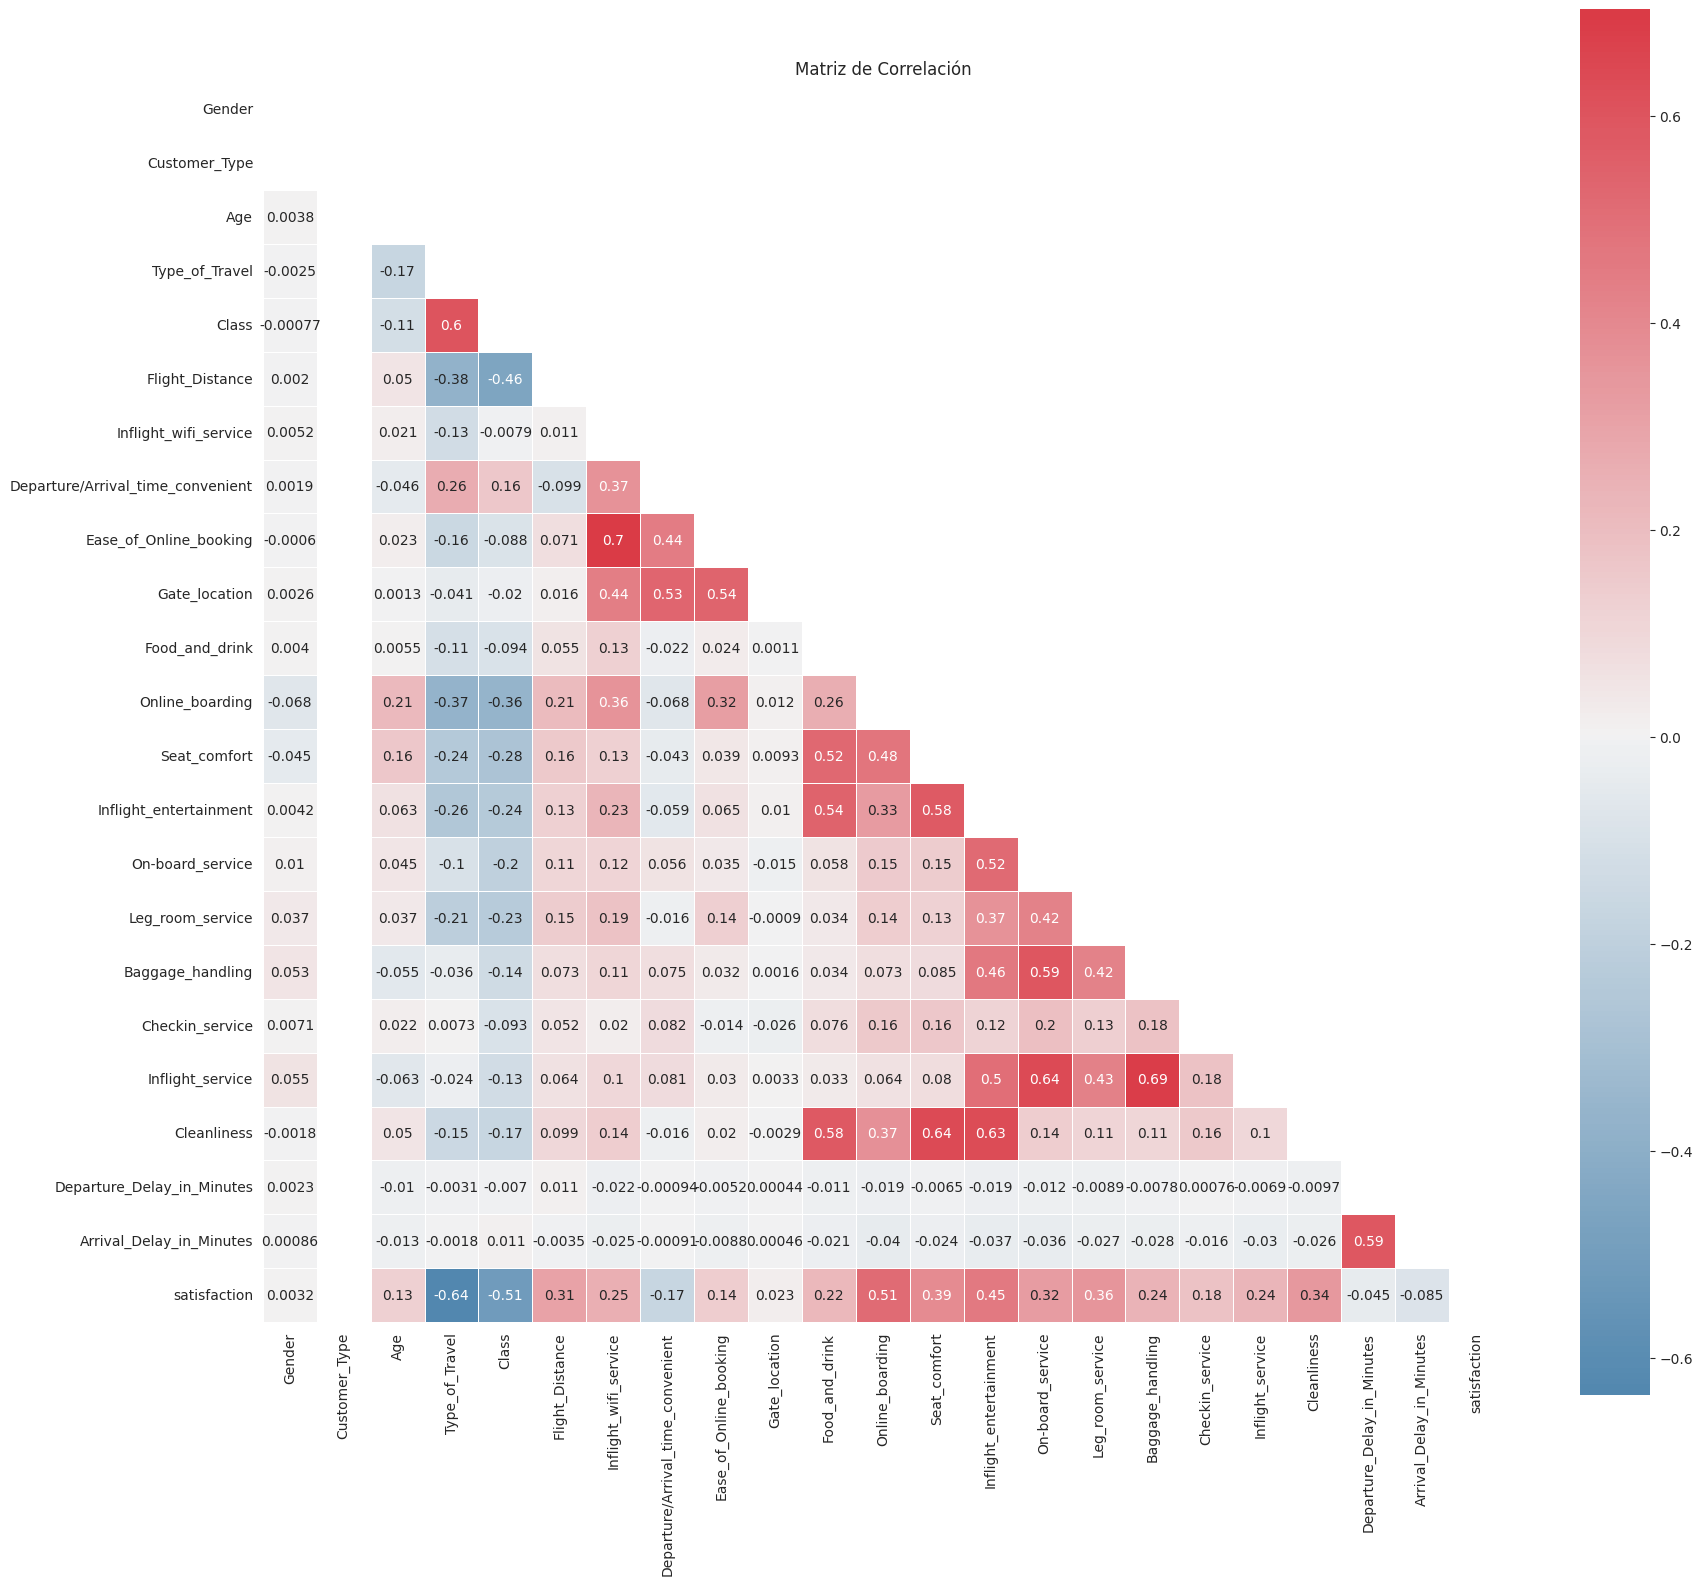

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
corr = train.corr()

# Crea una máscara triangular superior
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura el tamaño de la figura
f, ax = plt.subplots(figsize=(20, 20))

# Define la paleta de colores
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Crea el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

# Muestra el gráfico
plt.title("Matriz de Correlación")
plt.show()

***NOTAS:***

- "Ease_of_Online_booking" está altamente correlacionado con "Inflight_wifi_service" y "Inflight_service" está altamente correlacionado con "Baggage_handling". Pero ningún par tiene un coeficiente de correlación exactamente igual a 1.
- Por lo tanto, no existe una multicolinealidad perfecta. Por lo tanto, no descartamos ninguna variable.

### Selección de los top10-features utilozando Chi-Square

In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


### Importancia de los "feature" utilizando el método Wrapper

*(El método Wrapper es una técnica utilizada en aprendizaje automático para evaluar y seleccionar subconjuntos de características (variables) que optimizan el rendimiento de un modelo)*

In [ ]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00412513 0.         0.0258749  0.21982853 0.08990315 0.03140161
 0.12224491 0.01737014 0.03081474 0.01485982 0.01068989 0.11324523
 0.06338185 0.06652081 0.02798984 0.04231821 0.02388634 0.02276466
 0.02411625 0.03309566 0.00702376 0.00854455]


**Tipo de viaje", "Clase", "Servicio wifi a bordo", "Embarque en línea", "Comodidad del asiento", "Entretenimiento a bordo "** <br/>
Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment.
- Sólo estas seis características son inherentemente importantes para contribuir a la satisfacción del cliente o pasajero.
- También se utiliza otro método para decidir la importancia de las características con el fin de cotejar los resultados obtenidos con este método.


### Importancia dela Permutación de Característica  

In [ ]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

KeyboardInterrupt: 

***NOTAS:***

De todos los resultados anteriores, se puede concluir la siguiente lista de características importantes que afectan a la satisfacción del cliente o pasajero.

***Features mas importantes :*** <br/>

- Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

***Otros Features importantes:*** <br/>

- Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handlin

# **PARTE II**

#OBJETIVO




- Analizar el nivel de predictibilidad y su aplicabilidad en el análisis de series de tiempo en el Dataset Air_Passengers, del mejor modelo, considerando los siguientes 8 modelos:

  1. Logistic Regression
  2. Naive Bayes Classifier
  3. K-Nearest Neighbor Classifier
  4. Decision Tree Classifier
  5. Neural Network
  6. Random Forest
  7. Extreme Gradient Boosting
  8. Adaptive Gradient Boosting
  9. Considere, adicionalmente, 3 modelos complementarios.

- Considere el analisis y evaluación de las condiciones de aplicabilidad y evalue la hipótesis que se plantea en los correspondientes alcances de cada modelo que se plantea en la seccion siguinetes ("Alcances")


# **ALCANCE**

1. Regresión Logística:
  - La Regresión Logística es un modelo estadístico utilizado principalmente para tareas de clasificación binaria.
  - Aunque no es el enfoque más común para el análisis de series de tiempo, se puede aplicar si se transforma el problema en una clasificación binaria (por ejemplo, predecir si un valor de la serie de tiempo superará un umbral específico).
 2. Clasificador Naive Bayes:
  - El Clasificador Naive Bayes es simple y rápido, pero generalmente se utiliza para tareas de clasificación de texto o procesamiento del lenguaje natural.
  - No es la mejor opción para el análisis de series de tiempo, ya que no tiene en cuenta la estructura temporal de los datos.
3. K-Vecinos Más Cercanos (KNN):
  - KNN es un algoritmo que asigna un punto de datos a la clase más común entre sus k vecinos más cercanos en el espacio de características.
  - No es ideal para el análisis de series de tiempo, ya que no considera la dependencia temporal entre observaciones.
4. Árbol de Decisión:
  - Los Árboles de Decisión pueden ser útiles para el análisis de series de tiempo si se utilizan en conjunto con técnicas como el ensamblaje (por ejemplo, Random Forest o Gradient Boosting).
  - Pueden capturar patrones temporales y relaciones no lineales en los datos.
5. Redes Neuronales:
  - Las Redes Neuronales (también conocidas como redes neuronales artificiales) son modelos flexibles y potentes.
  - Son adecuadas para el análisis de series de tiempo, especialmente cuando se utilizan arquitecturas como las redes LSTM (Long Short-Term Memory) o GRU (Gated Recurrent Unit).
6. Random Forest:
  - Random Forest es un conjunto de árboles de decisión independientes.
  - Puede ser útil para el análisis de series de tiempo, especialmente si se combina con características de ingeniería adecuadas.
7. Gradient Boosting:
  - Gradient Boosting también utiliza árboles de decisión, pero los entrena secuencialmente para corregir los errores de los modelos anteriores.
  - Es una buena opción para el análisis de series de tiempo, especialmente cuando se necesita un alto rendimiento predictivo.
8. |Adaptive Gradient Boosting:
  - Similar al Gradient Boosting, pero con adaptaciones específicas.
  -  Puede ser útil para el análisis de series de tiempo, pero su elección dependerá de la naturaleza específica del problema.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns

[LightGBM] [Info] Number of positive: 25046, number of negative: 23911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 48957, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511592 -> initscore=0.046376
[LightGBM] [Info] Start training from score 0.046376
                         Model  Accuracy  Precision    Recall    TN    FP  \
0                Random Forest  0.966258   0.980438  0.951948  5963   117   
1          Logistic Regression  0.882435   0.879563  0.887987  5331   749   
2       Support Vector Machine  0.650245   0.706438  0.521916  4744  1336   
3                Decision Tree  0.951716   0.949040  0.955357  5764   316   
4            Gradient Boosting  0.952696   0.964232  0.94090

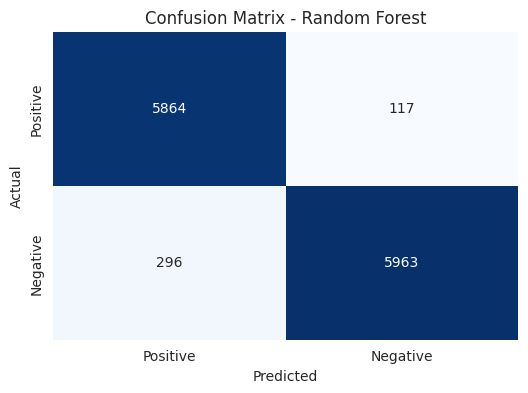

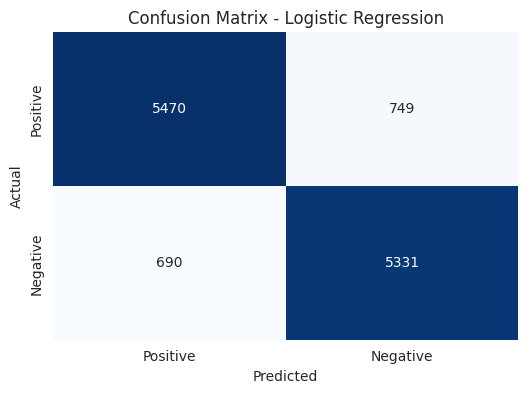

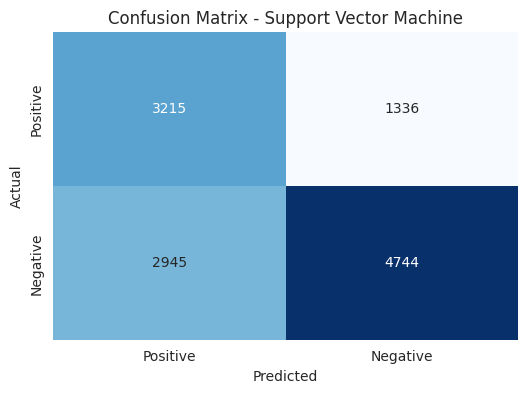

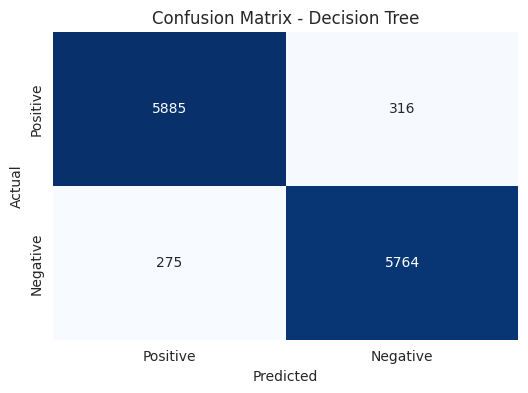

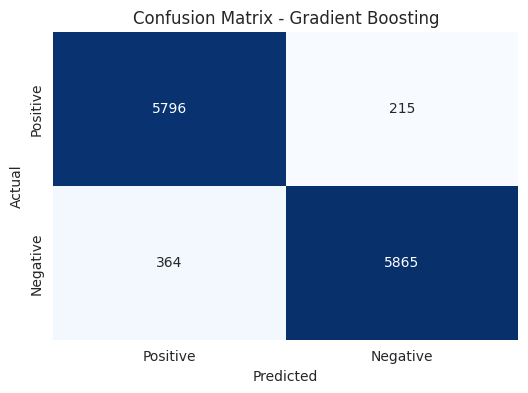

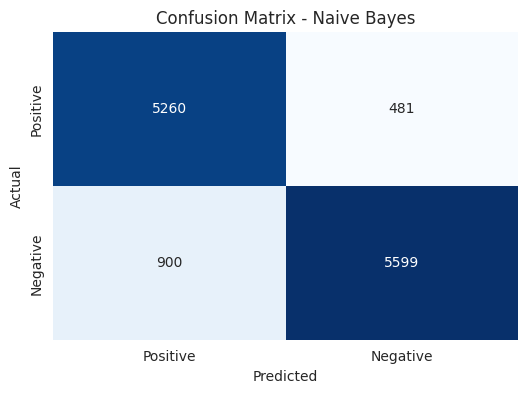

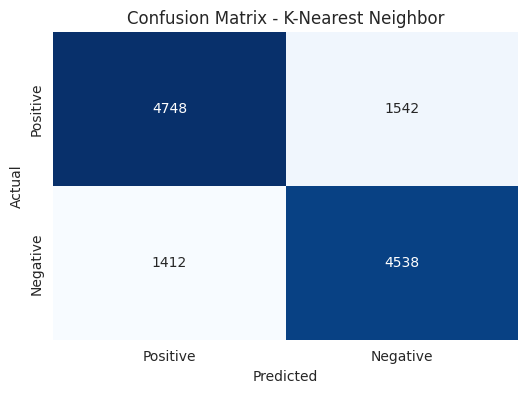

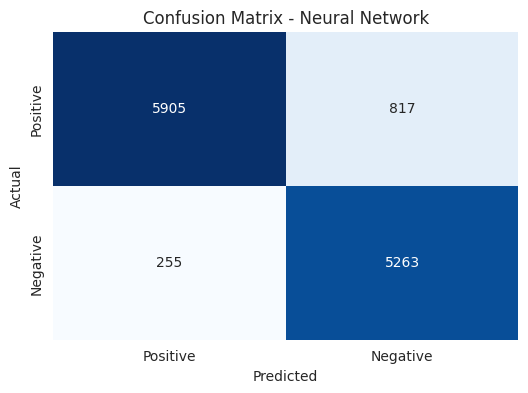

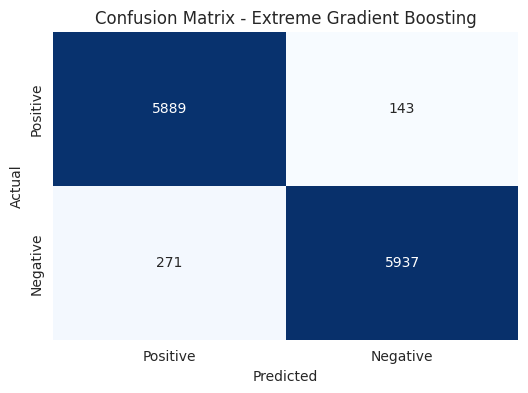

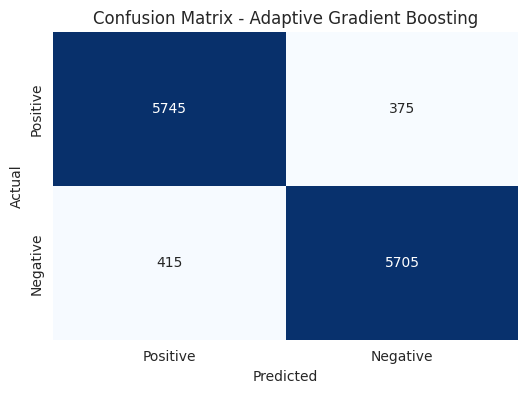

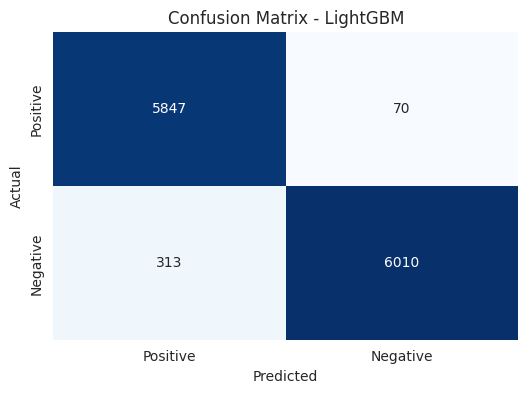

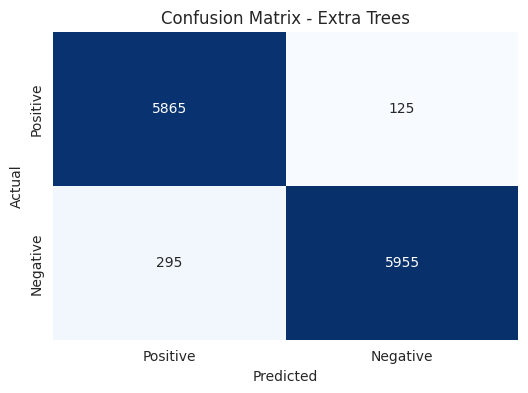

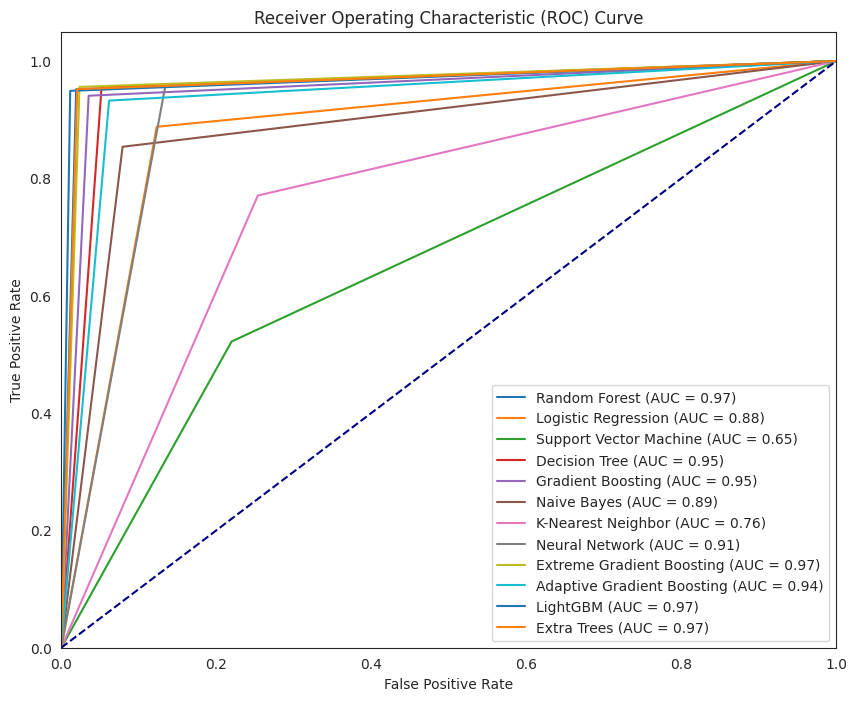

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Definir los modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000),
    'Extreme Gradient Boosting': XGBClassifier(random_state=42),
    'Adaptive Gradient Boosting': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Crear una lista para almacenar los resultados de cada modelo
results = []
roc_results = {}  # Almacenar resultados de ROC y AUC

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results.append((name, accuracy, precision, recall, tn, fp, fn, tp))

    # Calcular la curva ROC y el AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_results[name] = (fpr, tpr, roc_auc)

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'TN', 'FP', 'FN', 'TP'])
print(results_df)

# Visualizar las matrices de confusión con TN, TP, FP y FN
for _, row in results_df.iterrows():
    model_name = row['Model']
    tp, fp, fn, tn = row['TP'], row['FP'], row['FN'], row['TN']
    cm_display = [[tp, fp], [fn, tn]]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_display, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

print("Mejor modelo:")
print(best_model)

Mejor modelo:
Model        LightGBM
Accuracy     0.968709
Precision     0.98817
Recall       0.949188
TN               6010
FP                 70
FN                313
TP               5847
Name: 10, dtype: object
